In [1]:
# Se importan librerías principales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Se cargan los datos (como se vio en los descriptivos, los datos vienen limpios)
df = pd.read_csv("C:/Users/CArrieta/Downloads/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Se realiza el Análisis de Componentes principales, conservando el número de componentes que explica al menos el 90% de la varianza.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df_est = StandardScaler().fit_transform(df.iloc[:,1:])
pca_estimator = PCA(n_components=5)
pca_estimator.fit(df_est)
print("Varianza Explicada por 5 componentes: {}%".format(pca_estimator.explained_variance_ratio_.sum()*100))
pca_data = pd.DataFrame(pca_estimator.transform(df_est))

Varianza Explicada por 5 componentes: 94.53099756439514%


Elección de Clusters para K-Medias:


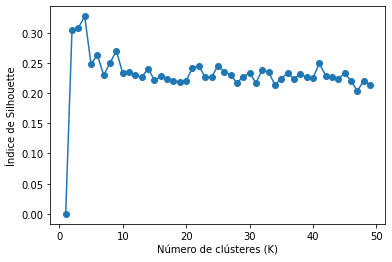

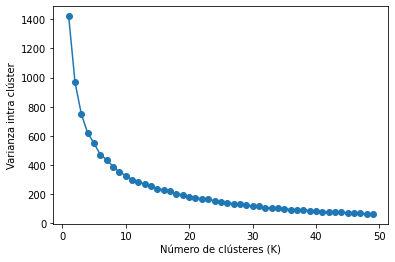

Elección de Clusters para K-Medoides:


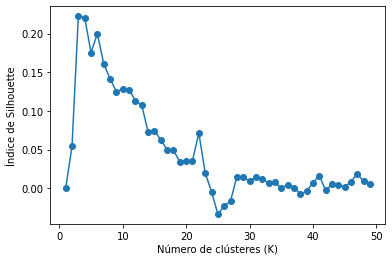

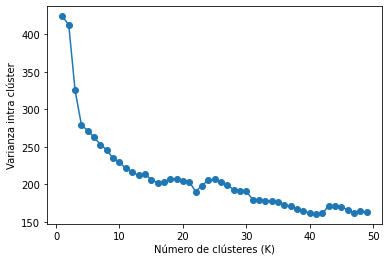

In [4]:
# Se grafican los coeficientes de silhouette y los elbow plots para elegir el número de clusters en K-Medias y K-Medoides
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids 
from sklearn.metrics import silhouette_score
print("Elección de Clusters para K-Medias:")
varianza_intra_cluster = []
silhouettes = []
for k in range (1, 50):
    kmeans = KMeans(n_clusters = k, random_state = 123).fit(pca_data)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(pca_data, kmeans.labels_)
    except:
        silhouette = 0
    silhouettes.append(silhouette)
plt.plot(range(1, 50), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

plt.plot(range(1, 50), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

print("Elección de Clusters para K-Medoides:")
varianza_intra_cluster = []
silhouettes = []
for k in range (1, 50):
    kmedoids = KMedoids(n_clusters = k, random_state = 123).fit(pca_data)
    varianza_intra_cluster.append(kmedoids.inertia_)
    try:
        silhouette = silhouette_score(pca_data, kmedoids.labels_)
    except:
        silhouette = 0
    silhouettes.append(silhouette)
plt.plot(range(1, 50), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

plt.plot(range(1, 50), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

In [5]:
from sklearn.metrics import accuracy_score
inert = []
for e in range(1,30):
    kmeans = KMeans(n_clusters = 6, random_state = e).fit(pca_data)
    inert.append(kmeans.inertia_)
    kmeans = kmeans.predict(pca_data)
print("\nDescriptivos sobre la inercia de los modelos de K-Medias sobre los datos resultado del PCA:")
print(pd.DataFrame(inert).describe())
kmeans = KMeans(n_clusters = 6, random_state = 18).fit_predict(pca_data) # Se elige el estado aleatorio 18 por ser el que menos varianza intra_cluster muestra
df['Cluster'] = kmeans
clusters_lst = []
for cluster in df['Cluster'].unique():
    clusterls = []
    for entry in df.iterrows():
        if entry[1]['Cluster'] == cluster:
            clusterls.append(entry[1]['country'])
    clusters_lst.append(clusterls)
print("\nPaises por Cluster de acuerdo con los 10 clusters en K-Medias:")
print(pd.DataFrame(clusters_lst).T.rename(columns={0:'Cluster 1',1:'Cluster 2',2:'Cluster 3',3:'Cluster 4',4:'Cluster 5',5:'Cluster 6',6:'Cluster 7',7:'Cluster 8',8:'Cluster 9',9:'Cluster 10'}))
df['Cluster'] = df['Cluster'].replace({0:'Cluster 1',1:'Cluster 2',2:'Cluster 3',3:'Cluster 4',4:'Cluster 5',5:'Cluster 6',6:'Cluster 7',7:'Cluster 8',8:'Cluster 9',9:'Cluster 10'})
for e in df.columns:
    if e not in ['country', 'Cluster']:
        print("\nDescriptivos por cluster para {}:".format(e))
        print(df.groupby('Cluster')[e].describe().round(2))


Descriptivos sobre la inercia de los modelos de K-Medias sobre los datos resultado del PCA:
                0
count   29.000000
mean   476.153370
std      8.329018
min    469.703424
25%    470.051399
50%    470.131501
75%    481.682869
max    497.058167

Paises por Cluster de acuerdo con los 10 clusters en K-Medias:
                   Cluster 1               Cluster 2  \
0                Afghanistan                 Albania   
1                     Angola     Antigua and Barbuda   
2                      Benin                 Bahamas   
3                   Botswana                 Bahrain   
4               Burkina Faso                Barbados   
5                    Burundi                 Belarus   
6                   Cameroon                  Belize   
7   Central African Republic                  Bhutan   
8                       Chad  Bosnia and Herzegovina   
9                    Comoros                Bulgaria   
10          Congo, Dem. Rep.                Cambodia   
11       

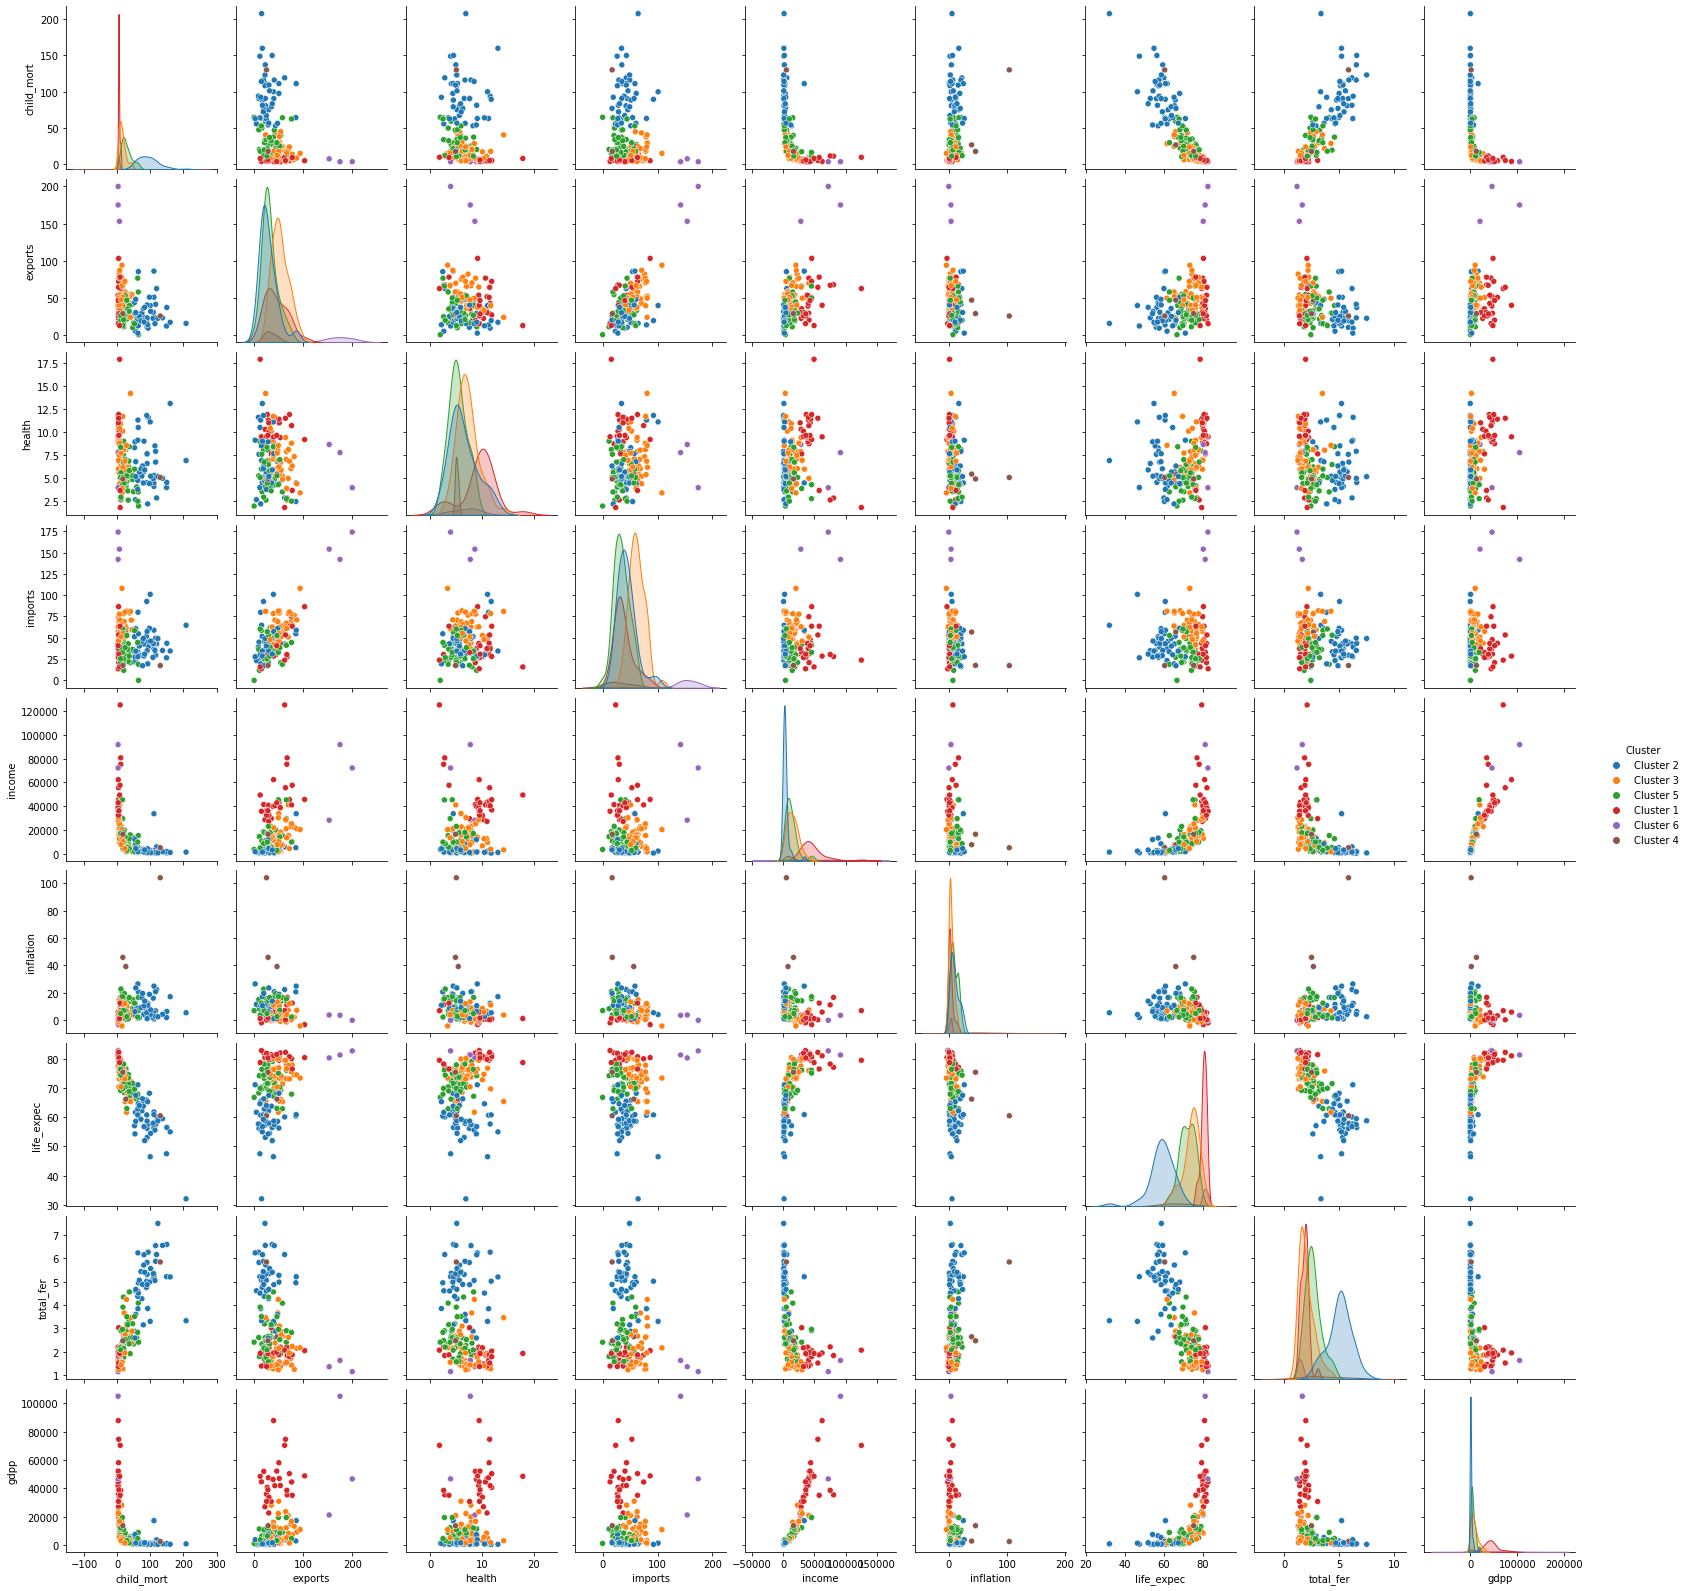

In [6]:
import seaborn as sns
sns.pairplot(df, hue='Cluster')
plt.show()

K-medoides

In [7]:
df_final= df.set_index("country").drop('Cluster', axis=1)

In [8]:
df_final.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
Dos_medoides = KMedoids(n_clusters = 10, random_state = 0).fit_predict(df_final)

In [10]:
df_final["cluster"]=Dos_medoides

In [11]:
df_final.groupby("cluster").describe()

child_mort                                                             \
             count       mean        std   min     25%    50%      75%    max   
cluster                                                                         
0              9.0  25.877778  18.045206   6.8  14.600  18.60   36.900   53.7   
1             18.0  10.622222   5.051797   4.5   6.325   9.35   14.350   21.5   
2             13.0  22.530769  13.980724   6.9  15.700  20.30   25.100   62.0   
3             12.0  20.758333  16.155858   5.5  10.675  17.15   20.875   63.7   
4              3.0  30.966667  21.682328  18.1  18.450  18.80   37.400   56.0   
5             18.0  51.327778  33.982207  17.2  27.175  38.80   62.625  130.0   
6             24.0   5.037500   2.408646   2.6   3.200   4.25    5.300   10.8   
7             16.0  13.806250  26.327184   3.2   3.875   5.40   12.225  111.0   
8             42.0  89.773810  36.478407  28.1  62.925  88.75  110.500  208.0   
9             12.0  24.658333   9.930894  11.2  17.700  24.10   33.350   42.7   

        exports             ... total_fer        gdpp                \
          count       mean  ...       75%   max count          mean   
cluster                     ...                                       
0           9.0  36.233333  ...    2.8800  4.56   9.0   5931.111111   
1          18.0  50.044444  ...    2.1500  2.60  18.0  12268.888889   
2          13.0  38.700000  ...    2.6600  3.66  13.0   4701.538462   
3          12.0  43.666667  ...    2.0700  4.08  12.0   7905.000000   
4           3.0  45.766667  ...    3.1550  3.60   3.0   4736.666667   
5          18.0  38.272222  ...    4.2325  6.16  18.0   2280.555556   
6          24.0  60.129167  ...    1.9575  2.21  24.0  51287.500000   
7          16.0  56.056250  ...    2.5325  5.21  16.0  23631.250000   
8          42.0  24.076167  ...    5.5275  7.49  42.0    836.285714   
9          12.0  36.150000  ...    2.6475  3.38  12.0   2952.500000   

                                                                      
                  std      min       25%      50%      75%       max  
cluster                                                               
0         1114.455522   4460.0   5080.00   6250.0   6680.0    7370.0  
1         2099.276875   9070.0  10725.00  12100.0  13400.0   16600.0  
2         1118.941808   2600.0   4140.00   4560.0   5020.0    7100.0  
3         1467.096700   5840.0   6762.50   8140.0   8412.5   11200.0  
4          427.823951   4340.0   4510.00   4680.0   4935.0    5190.0  
5          911.956347   1040.0   1357.50   2230.0   3022.5    3550.0  
6        17107.138416  35000.0  41500.00  46750.0  51950.0  105000.0  
7         5930.567005  12100.0  19675.00  22300.0  28650.0   33700.0  
8          559.151766    231.0    502.75    705.0    997.0    3600.0  
9          356.781701   2180.0   2825.00   2965.0   3137.5    3650.0  

[10 rows x 72 columns]

In [12]:
for e in df_final.columns:
    if e not in ['country', 'cluster']:
        print("\nDescriptivos por cluster para {}:".format(e))
        print(df_final.groupby('cluster')[e].describe().round(2))


Descriptivos por cluster para child_mort:
         count   mean    std   min    25%    50%     75%    max
cluster                                                        
0          9.0  25.88  18.05   6.8  14.60  18.60   36.90   53.7
1         18.0  10.62   5.05   4.5   6.32   9.35   14.35   21.5
2         13.0  22.53  13.98   6.9  15.70  20.30   25.10   62.0
3         12.0  20.76  16.16   5.5  10.68  17.15   20.88   63.7
4          3.0  30.97  21.68  18.1  18.45  18.80   37.40   56.0
5         18.0  51.33  33.98  17.2  27.18  38.80   62.62  130.0
6         24.0   5.04   2.41   2.6   3.20   4.25    5.30   10.8
7         16.0  13.81  26.33   3.2   3.88   5.40   12.22  111.0
8         42.0  89.77  36.48  28.1  62.92  88.75  110.50  208.0
9         12.0  24.66   9.93  11.2  17.70  24.10   33.35   42.7

Descriptivos por cluster para exports:
         count   mean    std    min    25%    50%    75%    max
cluster                                                        
0          9.0  36.23

# CLUSTER JERARQUICO

In [13]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Cluster 2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Cluster 3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Cluster 5
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Cluster 2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Cluster 3
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Cluster 5
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Cluster 4
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Cluster 3
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Cluster 2


In [14]:
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [15]:
df["id"] = df.index + 1


In [16]:
X= df.drop('country',axis=1)

In [17]:
data= X.drop('Cluster',axis=1)

In [18]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,id
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,4
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,163
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,164
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,165
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,166


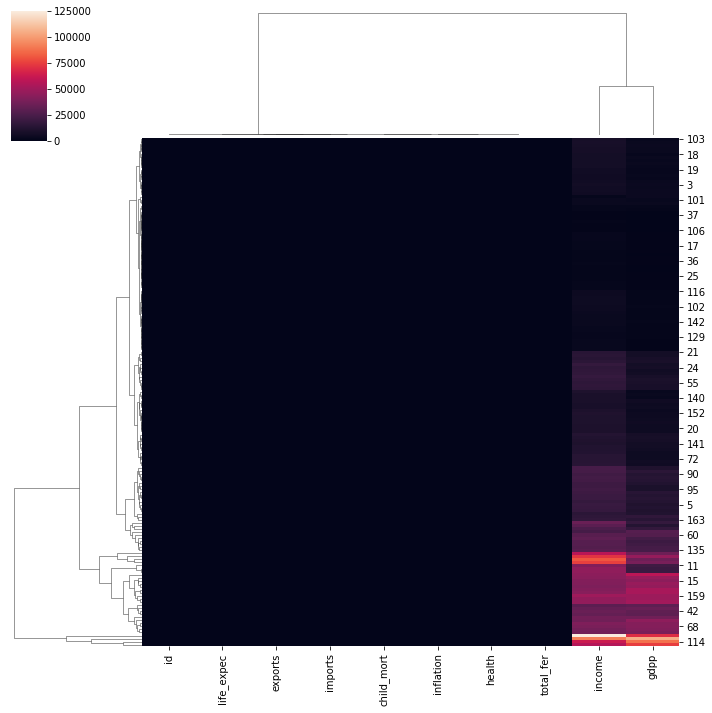

In [19]:
sns.clustermap(data)

In [20]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import numpy as np

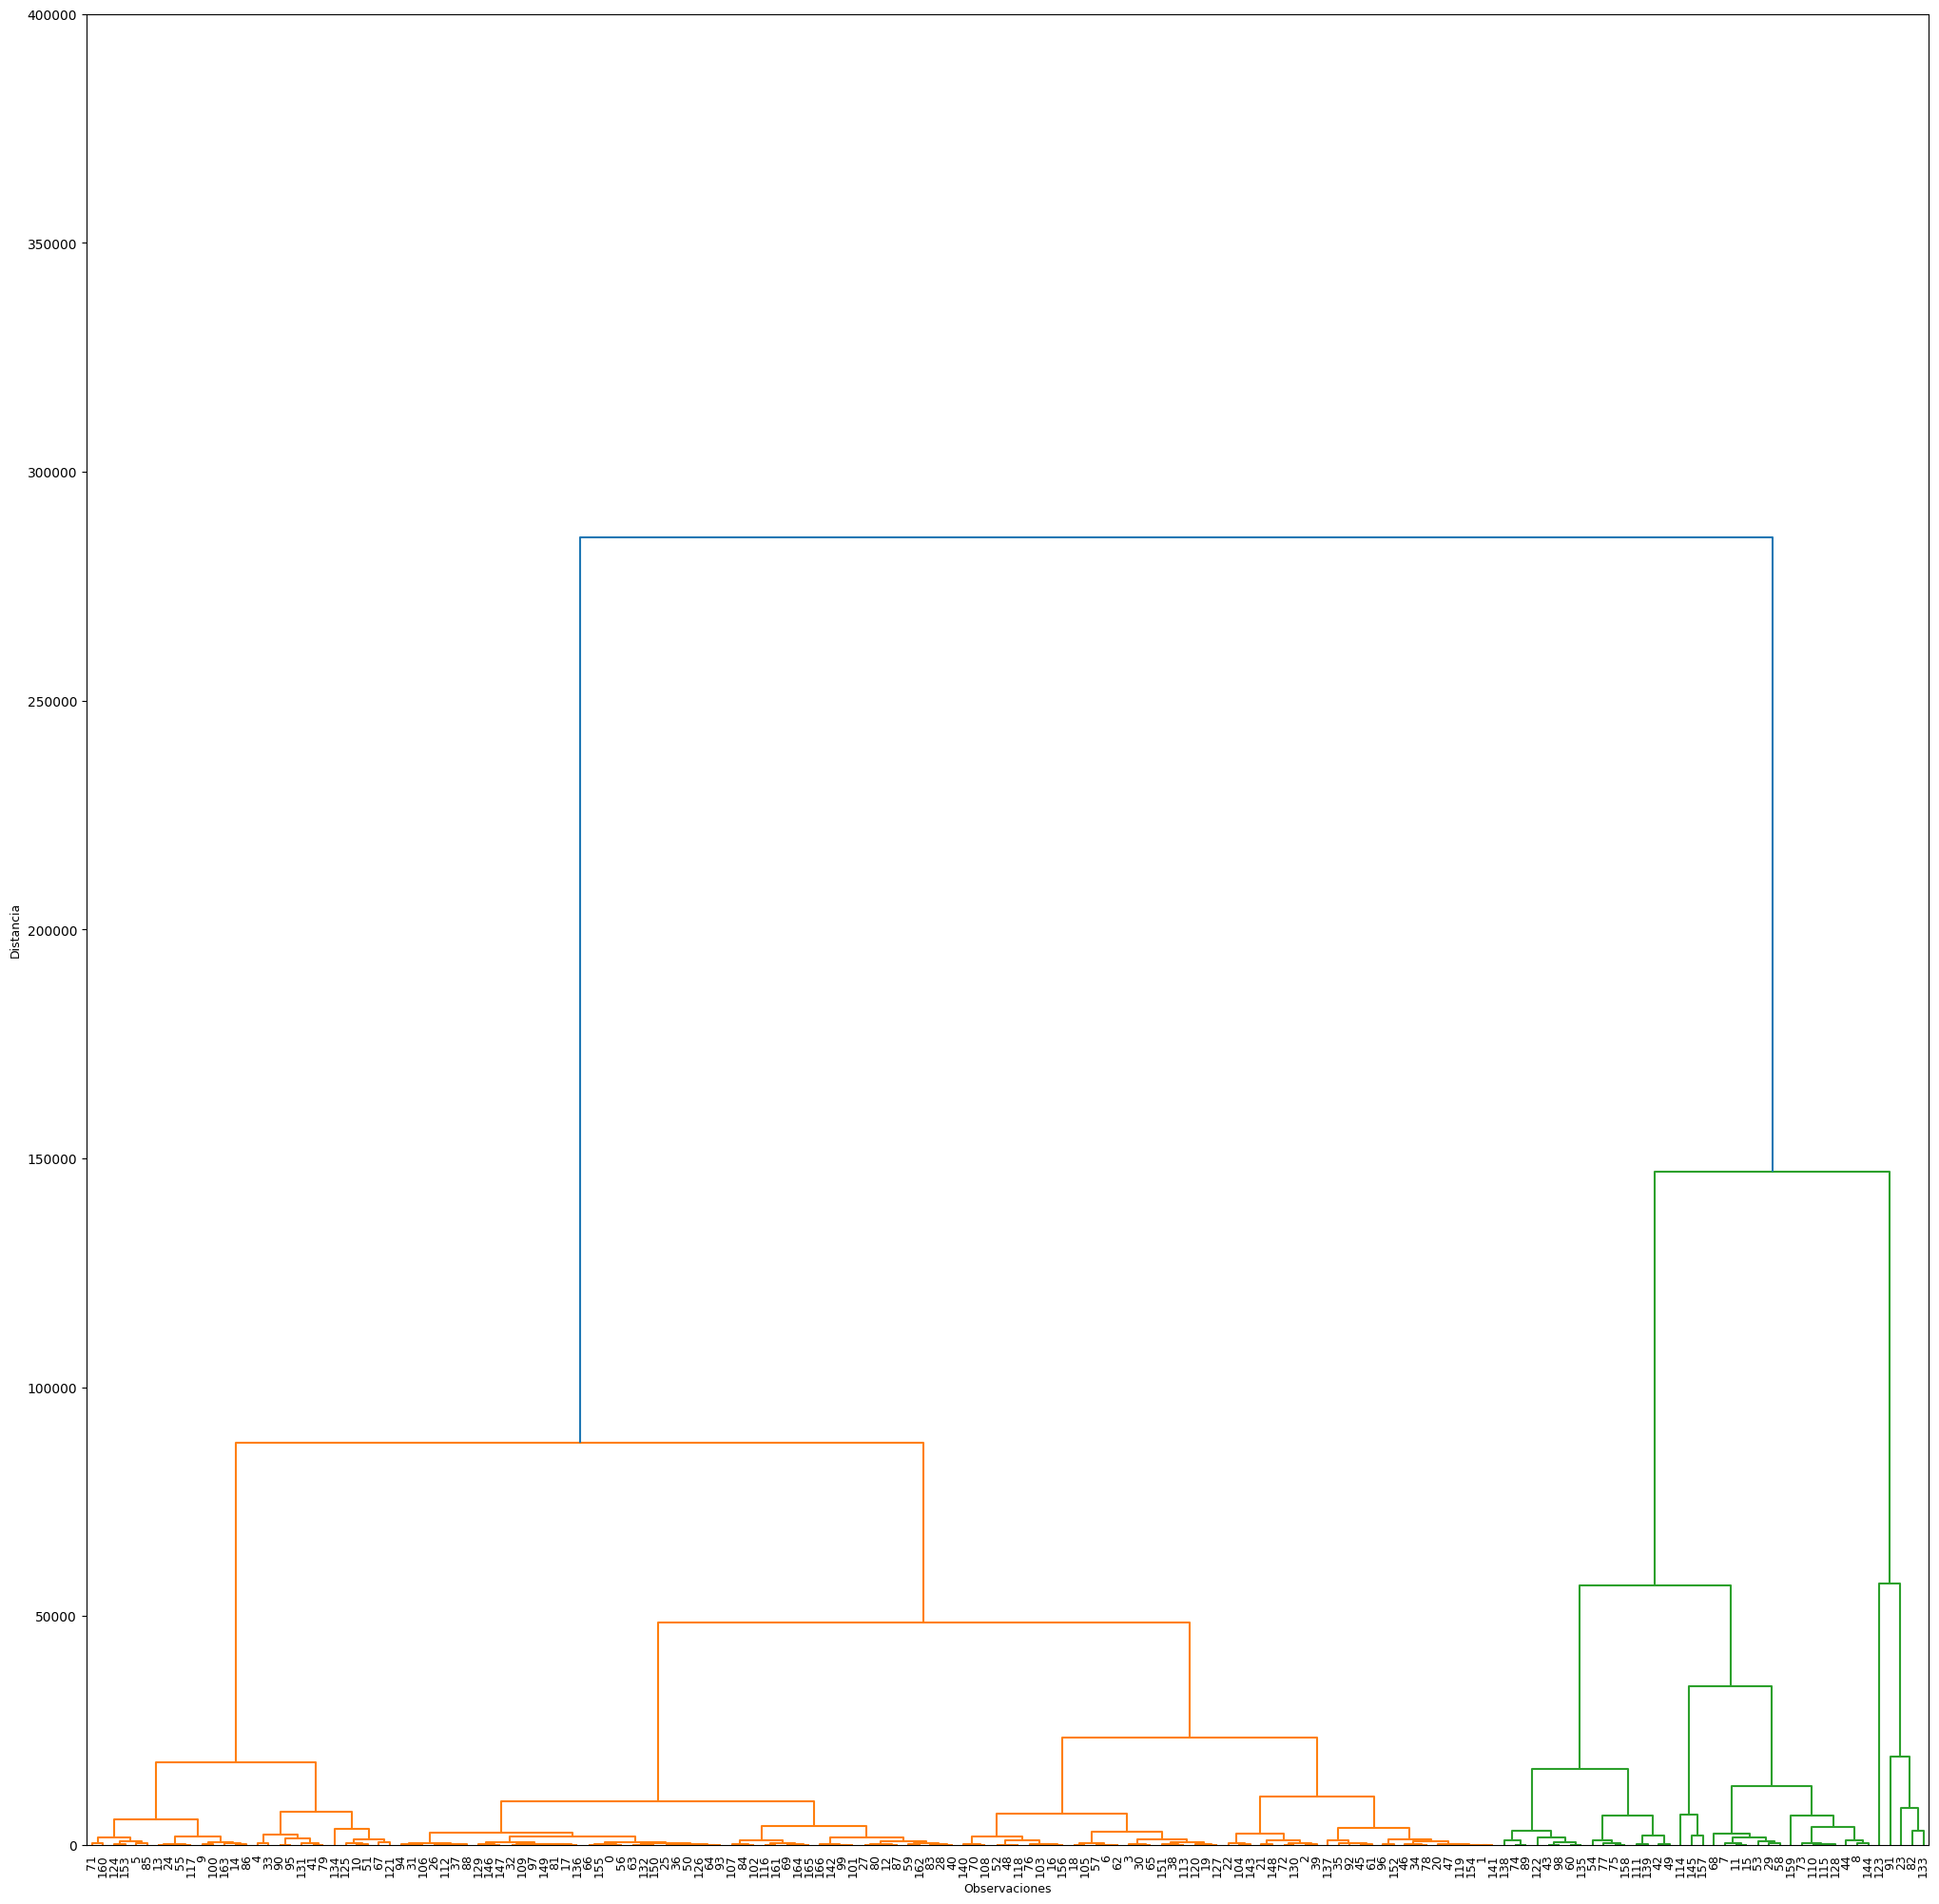

In [21]:
matplotlib.rc_file_defaults()
X = data[['income', 'health']].to_numpy()
dist = pdist(X, metric='euclidean')
Z = linkage(dist, method='ward')

fig, ax = plt.subplots(figsize=(25, 25))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=9, ax=ax)
ax.set_xlabel('Observaciones', fontsize=9)
ax.set_yticks(np.arange(0, 450_000, 50_000))
ax.set_ylabel('Distancia', fontsize=9)
plt.show()

Fijando la distancia en 80

In [22]:
cluster = AgglomerativeClustering(n_clusters=None,
                                  affinity='euclidean',
                                  linkage='ward',
                                  compute_full_tree=True,
                                  distance_threshold=80_000)

cluster.fit_predict(X)

print(f"Clusters a conformar = {cluster.n_clusters_}")



Clusters a conformar = 4


In [23]:
cluster_sk = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster_sk = cluster_sk.fit_predict(X)

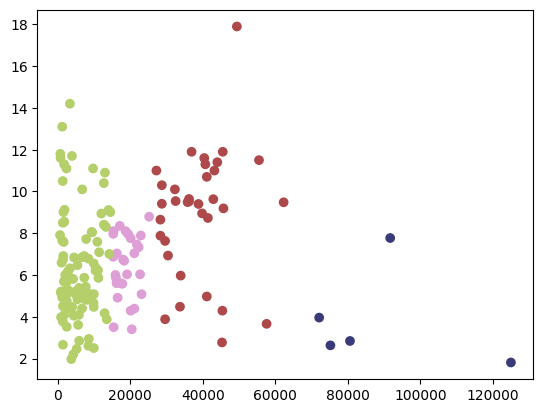

In [24]:
matplotlib.rc_file_defaults()
plt.scatter(X[:,0], X[:,1], c=cluster_sk, cmap='tab20b')
plt.show()